<a href="https://colab.research.google.com/github/LeandroCoelhos/estudos_datascience/blob/main/SHAP/SHAP_VALUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
url1 = 'https://raw.githubusercontent.com/LeandroCoelhos/credit_score/main/data/treino.csv'
url2 = 'https://raw.githubusercontent.com/LeandroCoelhos/credit_score/main/data/teste.csv'

treino = pd.read_csv(url1)
teste = pd.read_csv(url2)

In [3]:
def Renomeia(data):
  data.rename(columns = {'gender': 'Sexo',
                       'SeniorCitizen': 'Idoso',
                       'Partner': 'Parceiro',
                       'Dependents': 'Dependentes',
                       'tenure': 'Empresa',
                       'PhoneService':'Telefone',
                       'MultipleLines': 'VariasLinhas',
                       'InternetService': 'Provedor',
                       'OnlineSecurity': 'SegurancaOnline',
                       'OnlineBackup': 'BackupOnline',
                       'DeviceProtection': 'ProtecaoDispositivo',
                       'TechSupport': 'SuporteTecnico',
                       'StreamingTV': 'TV',
                       'StreamingMovies': 'Filmes',
                       'Contract': 'Contrato',
                       'PaperlessBilling': 'FaturaPapel',
                       'PaymentMethod': 'Pagamento'},inplace = True)
  return data

In [4]:
Renomeia(treino)
Renomeia(teste)

,Sexo,Idoso,Parceiro,Dependentes,Empresa,Telefone,VariasLinhas,Provedor,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,TV,Filmes,Contrato,FaturaPapel,Pagamento
0,Female,0,Yes,Yes,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
2,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
3,Female,0,No,No,48,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
4,Male,0,Yes,No,71,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
2496,Female,0,Yes,Yes,1,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
2497,Male,1,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
2498,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic)


In [5]:
def Mapeia(data):
  data['Sexo'] = data['Sexo'].map({'Male': 1, 'Female':0})
  data['Parceiro'] = data['Parceiro'].map({'Yes': 1, 'No':0})
  data['Dependentes'] = data['Dependentes'].map({'Yes': 1, 'No':0})
  data['Telefone'] = data['Telefone'].map({'Yes': 1, 'No':0})
  data['VariasLinhas'] = data['VariasLinhas'].map({'Yes': 1, 'No':0, 'No phone service':0})
  data['SegurancaOnline'] = data['SegurancaOnline'].map({'Yes': 1, 'No':0, 'No internet service':0})
  data['BackupOnline'] = data['BackupOnline'].map({'Yes': 1, 'No':0, 'No internet service':0})
  data['ProtecaoDispositivo'] = data['ProtecaoDispositivo'].map({'Yes': 1, 'No':0, 'No internet service':0})
  data['SuporteTecnico'] = data['SuporteTecnico'].map({'Yes': 1, 'No':0, 'No internet service':0})
  data['TV'] = data['TV'].map({'Yes': 1, 'No':0, 'No internet service':0})
  data['Filmes'] = data['Filmes'].map({'Yes': 1, 'No':0, 'No internet service':0})
  data['FaturaPapel'] = data['FaturaPapel'].map({'Yes': 1, 'No':0})
  data['Pagamento'] = data['Pagamento'].map({'Electronic check': 'Electronic', 'Mailed check': 'Mailed', 'Bank transfer (automatic)': 'automatic' , 'Credit card (automatic)': 'automatic'})
  data['FatorPremium'] = data['VariasLinhas'] + data['SegurancaOnline'] + data['BackupOnline'] + data['ProtecaoDispositivo'] + data['SuporteTecnico'] + data['TV'] + data['Filmes']
  return data

In [6]:
treino['Cliente'] = treino['Cliente'].map({'Premium': 1, 'Normal':0})

dt_treino = Mapeia(treino)
dt_teste = Mapeia(teste)

In [7]:
def Dummyfica(data):
  data = pd.get_dummies(data, columns = ['Pagamento', 'Provedor', 'Contrato'])
  return data

In [8]:
dt_treino2 = Dummyfica(dt_treino)
dt_teste2 = Dummyfica(dt_teste)

In [9]:
def DropColuna(data):
  data = data.drop(['Provedor_No', 'FaturaPapel', 'Sexo'#,  'Parceiro', #'VariasLinhas', 'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo', 'SuporteTecnico', 'TV', 'Filmes'
                    #, 'Pagamento_Electronic'#, 'Telefone' , 'FaturaPapel', 'Contrato_One year',  'Provedor_DSL'
                  ], axis = 1)
  return data

In [10]:
dt_treino3 = DropColuna(dt_treino2)
dt_teste3 = DropColuna(dt_teste2)

In [11]:
dt_treino3[(dt_treino3["FatorPremium"] == 0) & (dt_treino3["Cliente"] == 0)]['Cliente'].value_counts()

0    588
Name: Cliente, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dt_treino4 = dt_treino3.copy()
dt_teste4 = dt_teste3.copy()
dt_treino4['Empresa'] = sc.fit_transform(dt_treino3[['Empresa']])
dt_teste4['Empresa'] = sc.transform(dt_teste3[['Empresa']])

dt_treino4['FatorPremium'] = sc.fit_transform(dt_treino3[['FatorPremium']])
dt_teste4['FatorPremium'] = sc.transform(dt_teste3[['FatorPremium']])

In [13]:
#Separando em treino e Teste
xtreino = dt_treino4.drop(['Cliente'], axis=1)
ytreino = dt_treino4['Cliente'].to_list()
print(xtreino.shape)

(2500, 21)


#Correlação

In [14]:
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

In [15]:
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold 

from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

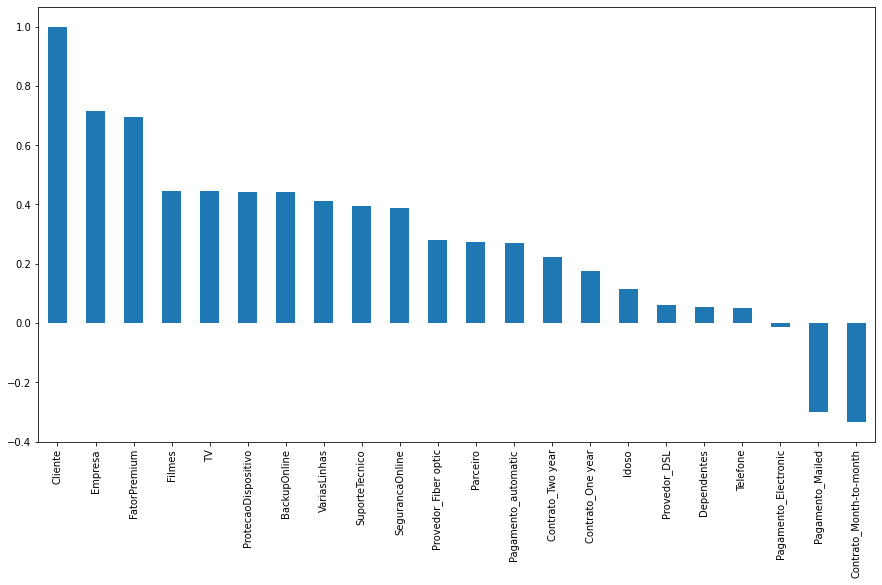

In [16]:
plt.figure(figsize=(15,8))
dt_treino4.corr()['Cliente'].sort_values(ascending = False).plot(kind='bar')

# Modelo

In [17]:
rf = RandomForestClassifier()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(xtreino, ytreino, test_size=0.25, shuffle =True)
rf.fit(X_train, y_train)

In [21]:
proba_rf = rf.predict_proba(X_test)
ped_rf = rf.predict(X_test)

In [22]:
confusion_matrix(y_test, ped_rf)

array([[326,   6],
       [  8, 285]])

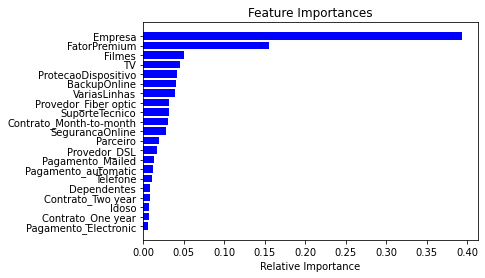

In [23]:
importances = rf.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [27]:
#!pip install shap

https://www.kaggle.com/code/dansbecker/advanced-uses-of-shap-values

In [ ]:
X_train, X_test, y_train, y_test

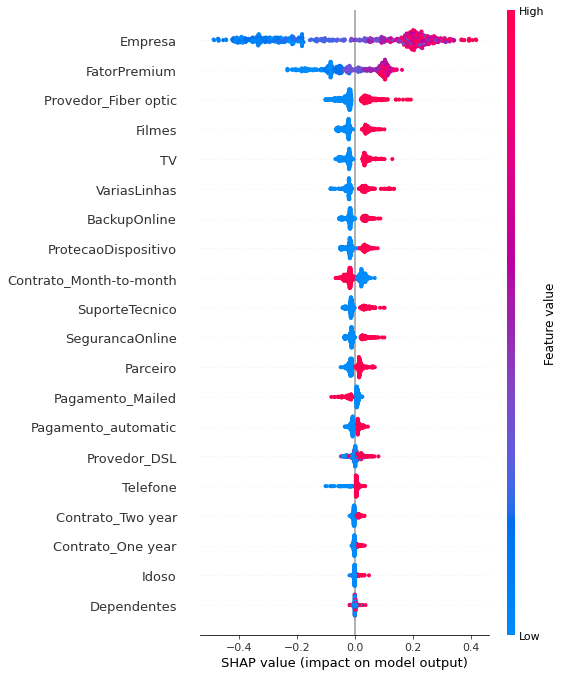

In [33]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

In [35]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)

# calculate shap values. This is what we will plot. 
#xtreino é o dataset todo
shap_values = explainer.shap_values(xtreino)

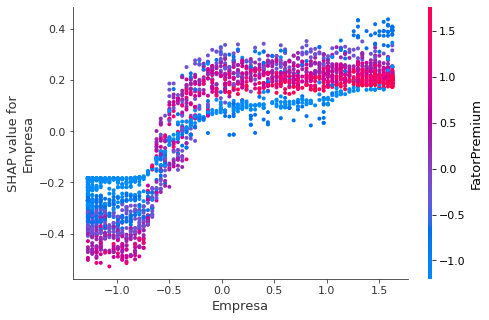

In [36]:
# make plot.
shap.dependence_plot('Empresa', shap_values[1], xtreino, interaction_index="FatorPremium")

https://github.com/slundberg/shap

In [29]:
import sklearn
import shap
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

In [30]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(rf.predict_proba, X_train)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [32]:
shap_values = explainer.shap_values(X_test, nsamples=100)

  0%|          | 0/625 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage.

KeyboardInterrupt: ignored

In [ ]:
# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

In [ ]:
# plot the SHAP values for the Setosa output of all instances
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")

# Shap

https://slundberg.github.io/shap/notebooks/NHANES%20I%20Survival%20Model.html

# outro

In [ ]:
shap_values = shap.TreeExplainer(rf).shap_values(X_test)

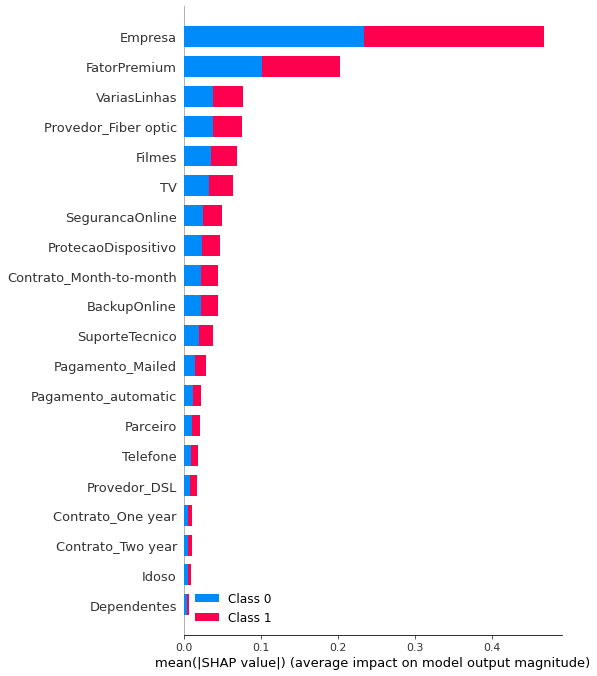

In [ ]:
shap.summary_plot(shap_values, X_test)

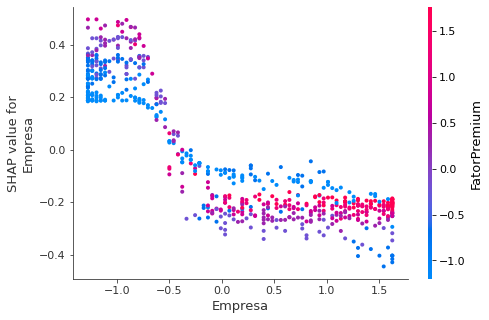

In [ ]:
shap.dependence_plot("Empresa", shap_values[0], X_test)

In [ ]:
# takes a couple minutes since SHAP interaction values take a factor of 2 * # features
# more time than SHAP values to compute, since this is just an example we only explain
# the first 2,000 people in order to run quicker
shap_interaction_values = shap.TreeExplainer(rf).shap_interaction_values(xtreino.iloc[:2000,:])

In [ ]:
shap.summary_plot(shap_interaction_values, xtreino.iloc[:2000,:])

In [ ]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(rf)

In [ ]:
shap_values = explainer(X_test)

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

Exception: ignored

In [ ]:
# visualize all the training set predictions
shap.plots.force(shap_values)

Exception: ignored

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)

IndexError: ignored

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

ValueError: ignored

In [ ]:
rf_shap_values = shap.KernelExplainer(rf.predict, X_test)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [ ]:
rf_shap_values

AttributeError: ignored

In [ ]:
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(rf)

In [ ]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

[02:58:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

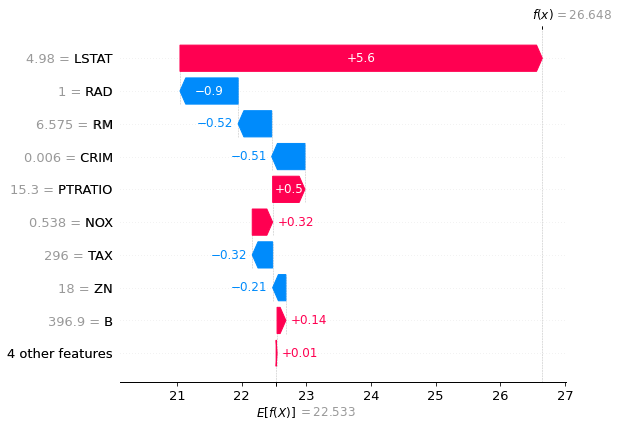

In [ ]:

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])